# Understanding Projections

## Goal 
Understand details about spatial data to gather how a point on a 3-d sphere can be presented in a two-dimensional plane.

## Outline
    - Datums
    - Units
    - What is a projection?
    - Globe demonstration 
    - Different types of projections - D3 example
    - Why do we care?

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np
import warnings

from IPython import display
import binascii
import os

warnings.filterwarnings('ignore')

## Understanding GIS Data

Question:  

How could we tell someone on the other side of the world where we want to meet them for coffee?


It depends on how we talk about the world.

- Do we use the same units?
- Do we understand direction the same?

Thankfully, we can communicate mathematically.

## So About the Earth

Well it's not flat. 

## Earth's Geometry

The earth actually isn't even a perfect sphere,   
especially given the topographic changes of mountain ranges and valleys.

[Earth Elevation Profile](https://www.linkedin.com/posts/chris-green-056a93115_30daymapchallenge-visualization-mapping-ugcPost-6871010849713094656-xHiI/)

## Sphereoid

We call the shape of the Earth a spheroid.  

A sphereoid is defined by:
- Semi-Major Axis
- Semi-Minor Axis 


## Spheroids

And there are many approximations (meters):
- Sphere; 6370997; 6370997
- Clarke (1866); 6378206.4; 6356583.8
- GRS80 (1980); 6378137; 6356768.33
- WGS1984 (1984); 6378137; 6356752.31

## Datum 

A datum is built on top of the selected spheroid and can incorporate local variations in elevation.

Basically, we are setting the origin of our sphere as if it were placed on the earths actual geoid.

For example: Bellingham, WA

| Datum | Longitude | Latitude |
|-------|-----------|----------|
| NAD 1927 | -122.46690368652 | 48.7440490722656 |
| NAD 1983 | -122.46818353793 | 48.7438798543649 |
| WGS 1984 | -122.46818353793 | 48.7438798534299 |

- NAD27 is quite different becasue it uses different spheroid and daturm
- NAD83 and WGS84 express coordinates that are nearly identical
    - same spheroid
    - different dataum


## Spherical Measurements

So what do we know about Circles/Spheres:
- 360 degrees


Break down a sphere into: 
- Latitute; parallels
- Longitude; meridians

Origins on the Earth: 
- Prime Meridian 
- Equator

Together form: Graticule

## Measurements on a Sphere 

Both of these are measurements from the Earth's center to a point of the Earth's surface.

These two allow us to find any place on Earth. 

Cool!!! And it's called:


### Geoographic Coordinate System

What is this actually measuring...?

- Degrees  

Units:
- Decimal Degrees
- Sexagesimal Degree: Degrees, Minutes, Seconds

Well what does that mean...?  
Described as a Coordinate Pair: (x,y) <- (in most cases)


### University of Puget Sound:

Decimal Degrees:
- Latiutude: 47.261780
- Longitude: -122.481689
- (47.261780, -122.481689) 

Sexagesimal
- 47 Degrees 15 Minutes 42.4080 Seconds
- 122 Degrees 28 Minutes 54.0804 Seconds

## Conversion 

DM -> DD:  

decimal degrees = degrees + Minutes/60 + seconds/3600

DD -> DM:  

absDegrees = |decimal degrees|  
floorAbsDegrees = |absDegrees|  
degrees = sgn(decimal degrees) * floorAbsDegrees  
minutes = |60 * (absDegrees - floorAbsDegrees)|  
seconds = 3600 * (absDegrees - floowAbsDegrees) - 60 * minutes| 

## Measurements on a Sphere Continued

1 degree of longitude at the equator: 111.321 KM

1 degree of longitude at 60 degrees of latitue: 55.802 KM

Woah, thats weird...

### Ends up, most people are not good at thinking in 3 dimensional space...

## What are our Alternatives?

### Convert to Planar Coordinate System!

- Convert a 3d sphere to a 2d plane.

Unlike Geographic Coordinate Systems, length, angle, and area are contstant in both the x and y directions.

### University of Puget Sound:

UTM Zone 10 (FT)
- Easting: 539230.069260529
- Northing: 5234383.60405841
- (539230.069260529, 5234383.60405841) 

WA State Plane South (FT):
- Latiutude: 1148411.465 
- Longitude: 709443.892
- (1148411.465, 709443.892) 

### This is Called a Projection

We can use different types of math here to be able to flatten the sphere to a 2d plane. 

Different projection formulas result in different types of projections.

Additionally, different projection formulas can be used to preserve angles, area, or distance.


## Projection Properties

### Conformal Projections
- Preserve local shape
- If graticules are intersecting at 90 degrees, can also preserve local angles

but... 

the area enclosed by intersection of arcs may be distorted.

### Equal-Area Projections
- Preserves area

Shape, angle, scale may all be distorted.
Graticules may not intersect at right angles.

### Eqidistant Projections
- Preserves distance

Scale is only preserved in some areas of a map.

### True-Direction Projections
- Shows the shortest route 

Scale is only preserved in some areas of a map.

## Different Types of Projections


### Albers Equal Area

Two standard parallels

Commonly used for maps of the conterminous United States.
- Conic
- Equal-area

- Shapes, directions, angles, and distances are generally distorted.
- The scale, directions, and distances are true only along the standard parallels

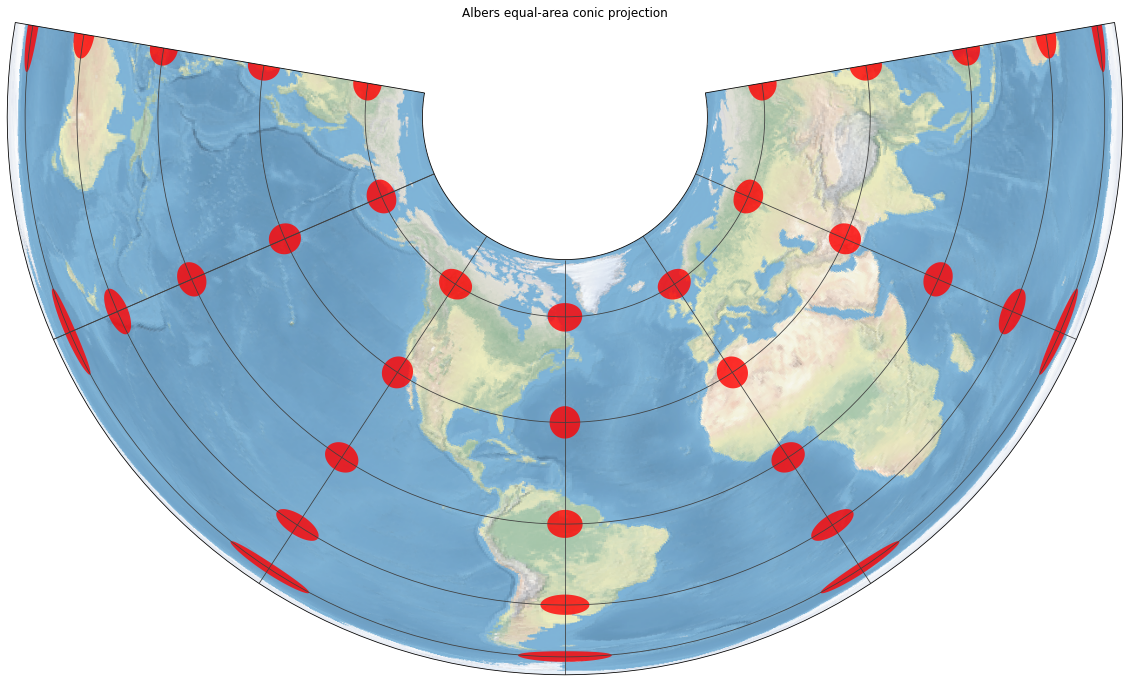

In [2]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(-60))
ax.set_title('Albers equal-area conic projection')
ax.stock_img()
ax.tissot(facecolor='r', alpha=.8, lats=np.arange(-90,90, 30)) # Add tissot indicatrisses
ax.gridlines(color='.25', ylocs=np.arange(-90,90, 30)) # Ad gridlines)

### Lambert Conformal Conic

Directions, angles, and shapes are maintained at infinitesimal scale.

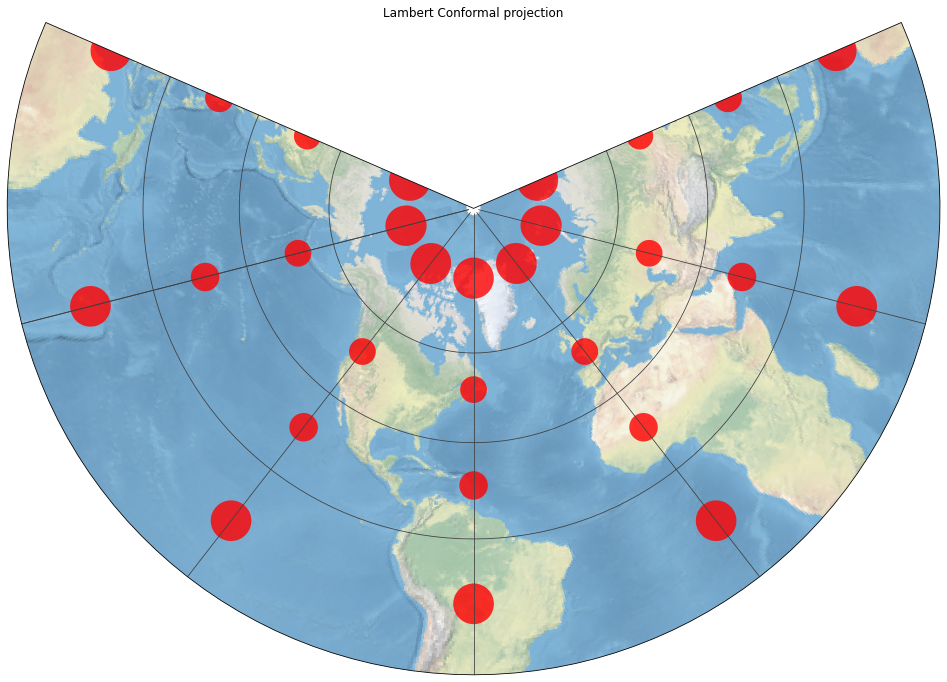

In [3]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection=ccrs.LambertConformal(-60))
ax.set_title('Lambert Conformal projection') # Add title for each subplot.
ax.stock_img()
ax.tissot(facecolor='r', alpha=.8) # Add tissot indicatrisses
ax.gridlines(color='.25', ylocs=np.arange(-90,90, 30)) # Ad gridlines)

### Equirectangular

The meridians and parallels are equally spaced straight lines forming a Cartesian grid.  

Each rectangular grid cell has the same size, shape, and area only in the projected space.

- North, south, east, and west directions are always accurate.
- General directions are distorted, except locally along the standard parallels.

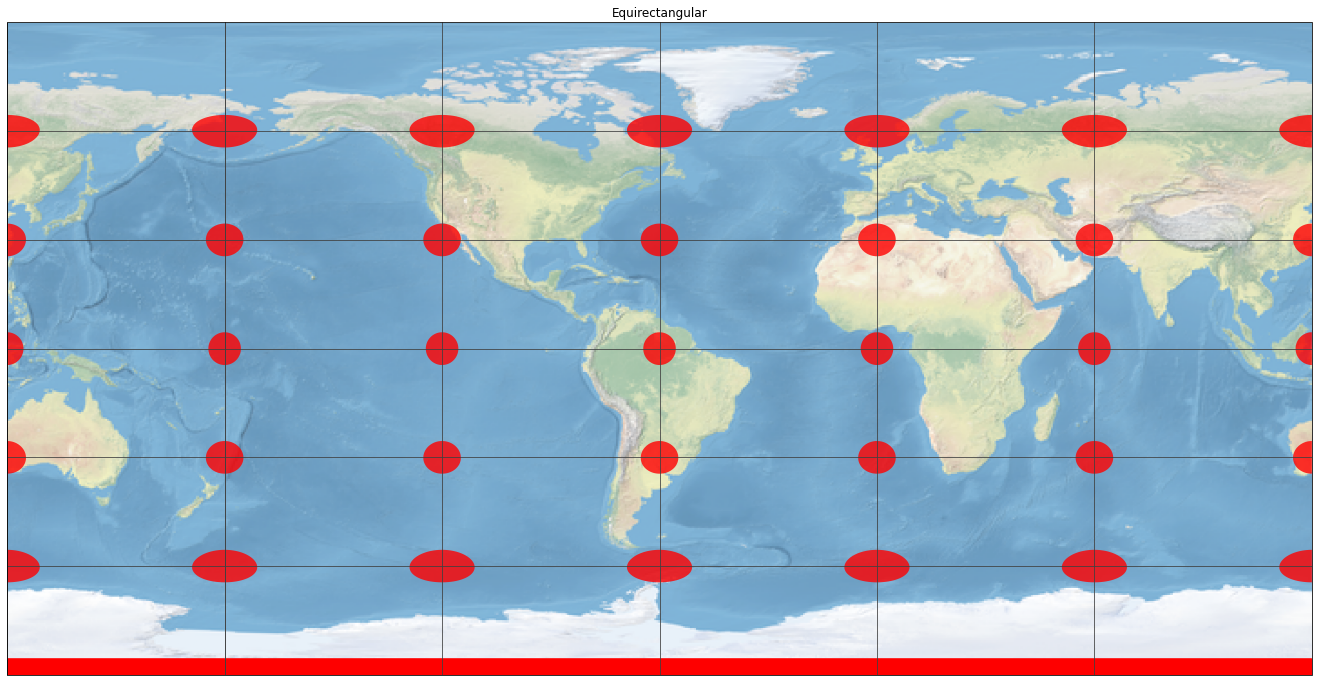

In [4]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection=ccrs.PlateCarree(-60))
ax.set_title('Equirectangular') # Add title for each subplot.
ax.stock_img()
ax.tissot(facecolor='r', alpha=.8, lats=np.arange(-90,90, 30)) # Add tissot indicatrisses
ax.gridlines(color='.25', ylocs=np.arange(-90,90, 30)) # Ad gridlines)

### Orthographic

- Neither conformal nor equal-area
- Shapes, areas, distances, directions, and angles are all generally distorted. 
- Only the center of the map is free of distortion. 

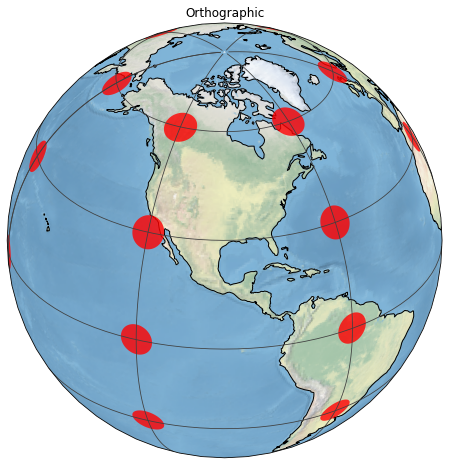

In [6]:
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.Orthographic(-96, 30))
ax.set_title('Orthographic') # Add title for each subplot.
ax.coastlines()
ax.stock_img()
ax.tissot(facecolor='r', alpha=.8, lats=np.arange(-90,90, 30)) # Add tissot indicatrisses
ax.gridlines(color='.25', ylocs=np.arange(-90,90, 30)) # Ad gridlines)


### Transverse Mercator

Used for mapping large-scale or smaller areas with predominantly north-south trending extents.  

Conformal map projection  
- Preseves Distance and Angles 
    - Can use the Pythagorean theorem to be able to calculate distances
    - Great for in the field 


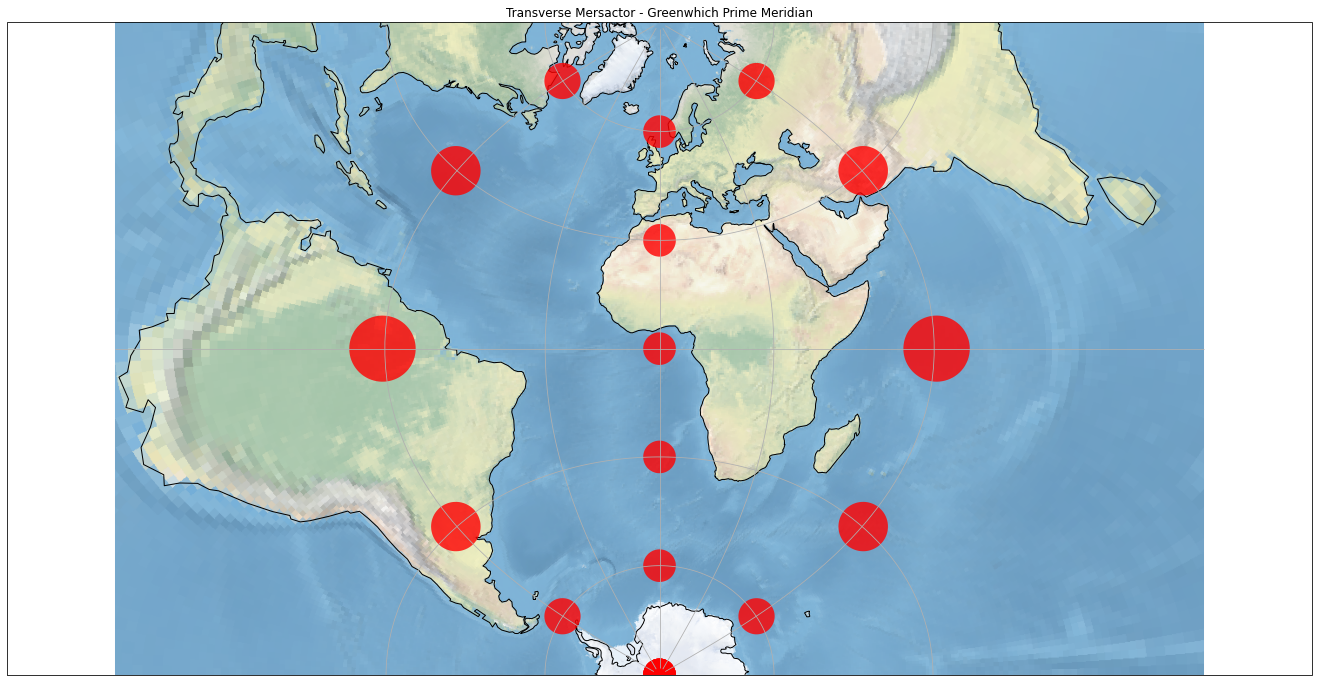

In [7]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection=ccrs.TransverseMercator(
                        approx=False))
ax.set_title('Transverse Mersactor - Greenwhich Prime Meridian')
ax.coastlines(resolution='110m')
ax.gridlines()
ax.stock_img()
ax.tissot(facecolor='r', alpha=.8, lats=np.arange(-90,90, 30)) # Add tissot indicatrisses

### Universal Transverse Mercator


The UTM system divides the Earth into 60 zones, each 6° of longitude in width.

- Conformal Projection

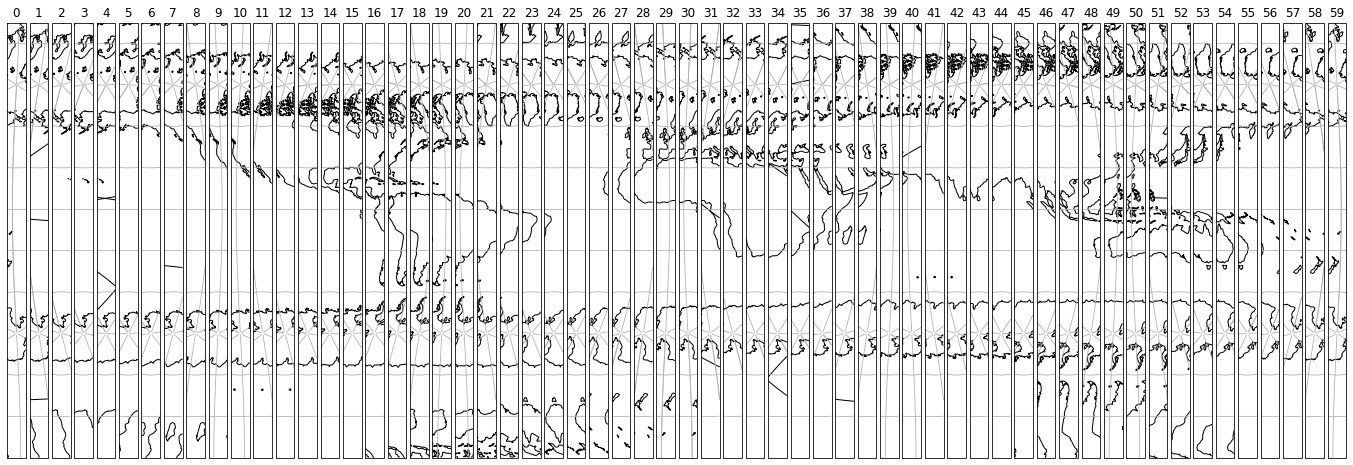

In [8]:
nplots = 60

fig = plt.figure(figsize=(24, 12))

for i in range(0, nplots):
    ax = fig.add_subplot(1, nplots, i+1,
                         projection=ccrs.UTM(zone=i+1,
                                             southern_hemisphere=True))
    ax.coastlines(resolution='110m')
    ax.set_title(i)
    ax.gridlines()


### UTM Zone 10 - Washington State

| UTM Zone | Central Meridian | UTM Zone Extent |
|----------|------------------|-----------------|
| 10 | 123°W | 126°W-120°W |

- Preserves distance in North-South Direction

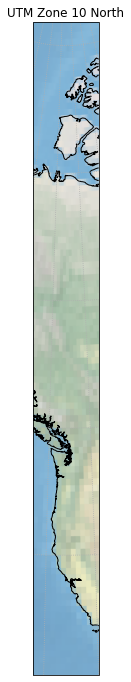

In [10]:
fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection=ccrs.epsg(26910))
ax.set_title("UTM Zone 10 North")
ax.gridlines(linestyle=":")
ax.coastlines(resolution='10m')
ax.stock_img()
plt.show()

### State Plane 

State Plane system of large-scale conformal map projections originally created in the 1930s to support surveying, engineering, and mapping activities throughout the U.S. and it's territories.

![StatePlane](https://geodesy.noaa.gov/SPCS/images/all_spcs_27_and_83.png)

In [11]:
WASHINGTON_NORTH = 2926
WASHINGTON_SOUTH = 2927
SEATTLE_BOUNDS = [-122.4596959,-122.2244331,47.4919119,47.734145]
WASHINGTON_BOUNDS = [-124.849,-116.9156,45.5435,49.0024]
UPS = (-122.481689, 47.261780)

counties = gpd.read_file('zip://data/WA_County_Bndys.zip!WA_County_Bndys')
wa_counties_stateplane_north = ["Chelan", "Clallam", "Douglas", "Ferry", "Island", "Jefferson", "King", "Kitsap", "Lincoln", "Okanogan", "Pend Oreille", "San Juan", "Skagit", "Snohomish", "Spokane", "Stevens", "Whatcom", "Grant"]

north_counties = counties.JURISDIC_1.isin(wa_counties_stateplane_north)
south_counties = ~counties.JURISDIC_1.isin(wa_counties_stateplane_north)

wa_sp_n_geo = counties[north_counties]
wa_sp_s_geo = counties[south_counties]

wa_sp_n = ccrs.epsg(WASHINGTON_NORTH)
wa_sp_s = ccrs.epsg(WASHINGTON_SOUTH)

wa_sp_n_proj4 = wa_sp_n.proj4_init
wa_sp_s_proj4 = wa_sp_s.proj4_init
counties_wa_sp_n = wa_sp_n_geo.to_crs(wa_sp_n_proj4)
counties_wa_sp_s = wa_sp_s_geo.to_crs(wa_sp_s_proj4)


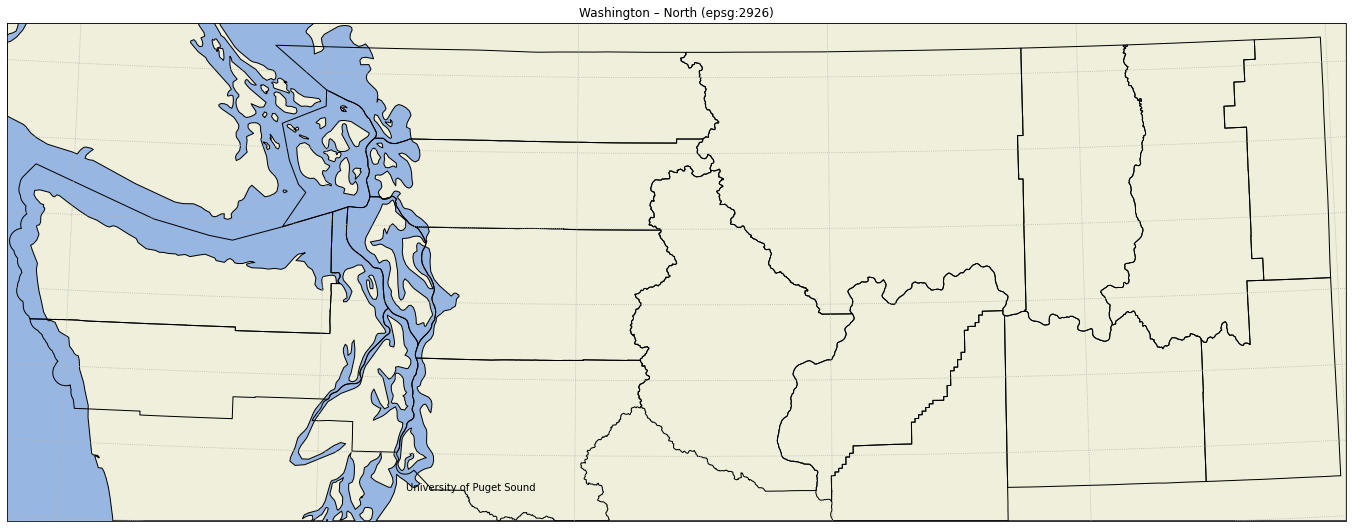

In [12]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection=ccrs.epsg(WASHINGTON_NORTH))
ax.set_title("Washington – North (epsg:2926)")
ax.annotate('University of Puget Sound', xy=UPS, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='Black',
            ha='left', va='center')
ax.gridlines(linestyle=":")
ax.add_geometries(counties_wa_sp_n['geometry'], crs=ccrs.epsg(WASHINGTON_NORTH), facecolor='none', edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
plt.show()

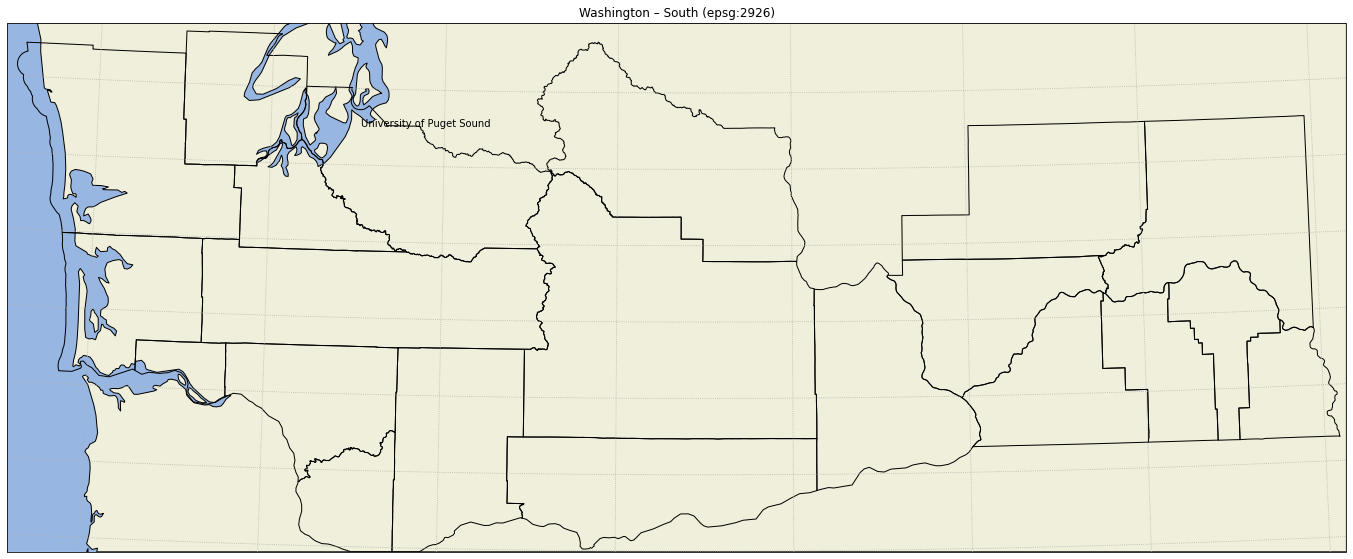

In [13]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection=ccrs.epsg(WASHINGTON_SOUTH))
ax.set_title("Washington – South (epsg:2926)")
ax.annotate('University of Puget Sound', xy=UPS, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='Black',
            ha='left', va='center')
ax.gridlines(linestyle=":")
ax.add_geometries(counties_wa_sp_s['geometry'], crs=ccrs.epsg(WASHINGTON_SOUTH), facecolor='none', edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
plt.show()

Loosely based on: 
- Transverse Mercator projection
- Lambert conformal conic projection

Problems - Puget Sound Metro

King County: "Washington State Plane North"  
Pierce County: "Washington State Plane South"

I have even encountered a custom projection to deal with this issue!!

## Takeaways
There are a variety of different projections for different reasons and I don't expect you to know them all.  

However, you will need to know how to find a projection of a data source, map, and other services to be able to work with data.

Each agency typically has their own standards and you will be asked to use that when working with that data.

## Resources

[Projections in ArcGISPro](https://pro.arcgis.com/en/pro-app/latest/help/mapping/properties/list-of-supported-map-projections.htm)

# Reading

Learning ArcGIS Pro 2: Chapter 3